In [48]:
import scanpy as sc
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
adata = sc.read_visium("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\data\\10x2")

c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [55]:
adata = sc.read("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\data\\Resultados\\D_anot\\10x2_filtered.h5ad")

In [58]:
adata = sc.read_h5ad("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\data\\Resultados\\D_anot\\10x2_anot80_namefix.h5ad")

c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


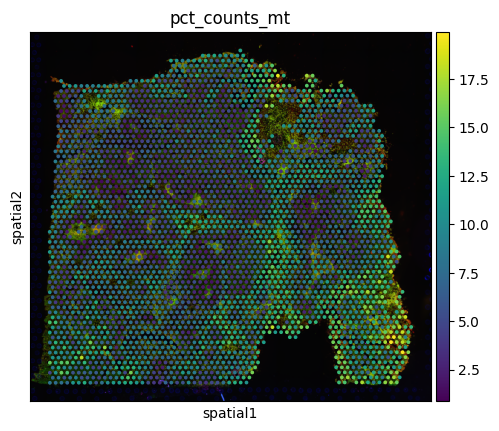

In [59]:
sc.pl.spatial(adata, color=["pct_counts_mt"])

c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


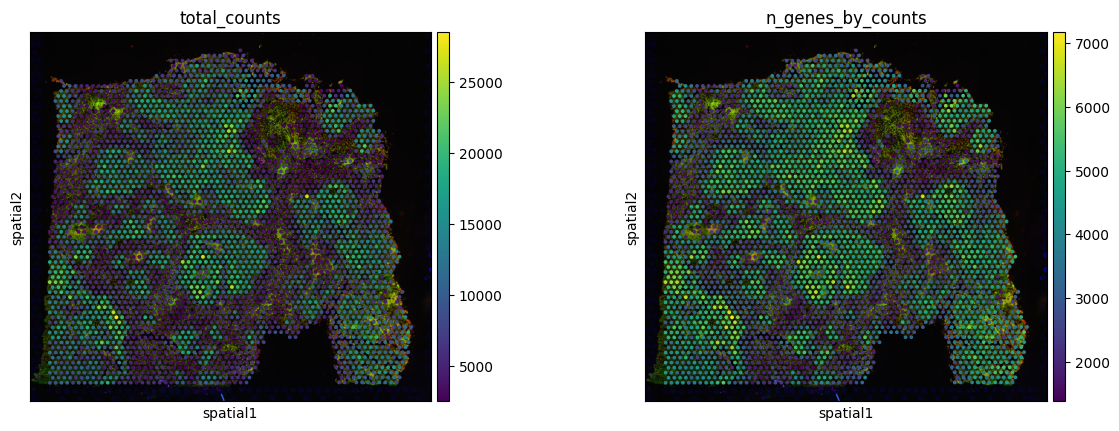

In [60]:
sc.pl.spatial(adata, color=["total_counts", "n_genes_by_counts"])

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [63]:
adata

AnnData object with n_obs × n_vars = 3365 × 17985
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'B cell', 'endothelial cell', 'monocyte'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'proportions', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [64]:
adata.obsm["proportions"].head(5)

,fibroblast,T cell,mast cell,endothelial cell,B cell,dendritic cell,plasma cell,cancer_cell,monocyte
AAACAAGTATCTCCCA-1,0.180062,0.062619,0.093487,0.139220,0.120219,0.004681,0.048773,0.249646,0.101293
AAACACCAATAACTGC-1,0.175999,0.075711,0.118159,0.125386,0.138617,0.007450,0.027249,0.223193,0.108237
AAACAGGGTCTATATT-1,0.144867,0.078585,0.117353,0.135236,0.135269,0.005756,0.022490,0.253119,0.107326
AAACATTTCCCGGATT-1,0.197788,0.062440,0.071826,0.211263,0.115696,0.005882,0.076119,0.163054,0.095934
AAACCCGAACGAAATC-1,0.136260,0.082399,0.122674,0.126893,0.147547,0.008042,0.026302,0.218611,0.131272


In [69]:
sc.set_figure_params(figsize=(8, 8))

In [92]:
adata.obs['B cell'] = adata.obsm['proportions']['B cell']

c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


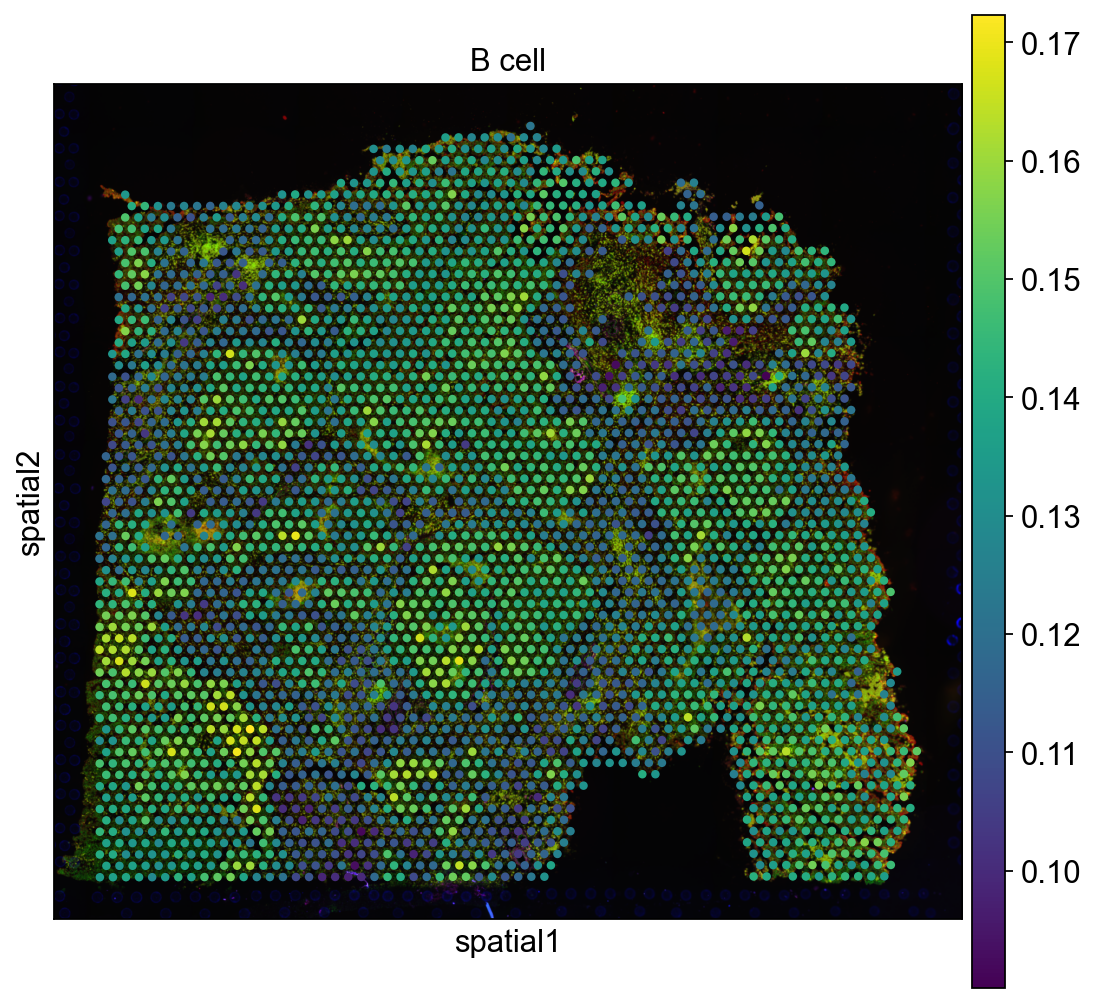

In [93]:
sc.pl.spatial(adata, color="B cell")

In [66]:
from anallisys import Analysis